In [79]:
import numpy as np
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt

In [80]:
def get_x_y(file_name):
    with open(file_name) as f:
        data = f.readlines()
        x, y = data
        x, y = list(map(float, x.split())), list(map(float, y.split()))
        return np.array(x), np.array(y)

In [81]:
def f(x):
    return x**2 - 5*x + 6

In [82]:
def df(x, y):
    return (np.power(y + x - 2, 2) - np.power(y, 2)) / np.power(x-2, 2)

In [83]:
def f1(x):
    return (1 + x + np.power(x, 2)) * np.exp(x) - 3

In [84]:
def f2(x):
    return 2 * (np.exp(x) + x * np.exp(x) - 1)

In [85]:
def dfs(x, y):
    y1, y2 = y
    f1 = 2 * y2 - y1 + 1
    f2 = 3 * y2 - 2 * y1
    return [f1, f2]

In [86]:
y0 = [6,]
x_range = [0, 1]
x = np.linspace(*x_range, 11)
files = ['milne_h0.001000.txt',
        'milne_h0.010000.txt',
        'milne_h0.100000.txt',
        'runge_kutta_h0.001000.txt',
        'runge_kutta_h0.010000.txt',
        'runge_kutta_h0.100000.txt',
        'runge_kutta_system1_h0.100000.txt',
        'runge_kutta_system2_h0.100000.txt']

In [87]:
solver = solve_ivp(df, x_range, y0, dense_output=True)
y = solver.sol(x)[0]

In [88]:
x1 = x[5]; x2 = x[10]
y1 = y[5]; y2 = y[10]
x1, x2, y1, y2

(0.5, 1.0, 3.7488354716350436, 2.0009046635644365)

In [89]:
abs(y1 - f(x1))

0.0011645283649563964

In [90]:
abs(y1 - f(x1))/f(x1)*100

0.03105408973217057

In [91]:
abs(y2 - f(x2))

0.0009046635644365253

In [92]:
abs(y2 - f(x2))/f(x2)*100

0.045233178221826265

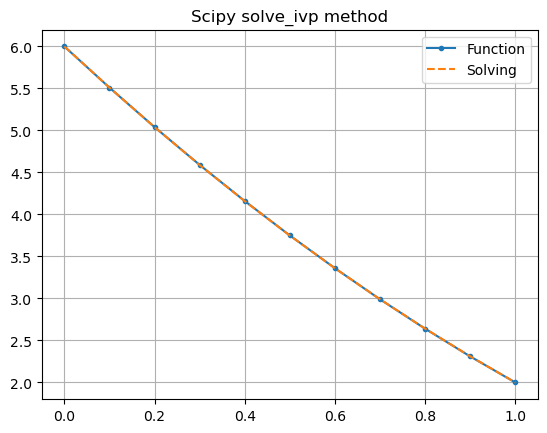

In [93]:
plt.plot(x, f(x), '.-', label='Function')
plt.plot(x, y, '--', label='Solving')
plt.legend()
plt.grid()
plt.title('Scipy solve_ivp method');

In [94]:
y0 = [-2, 0]

In [95]:
solver = solve_ivp(dfs, x_range, y0, t_eval=x)
y1, y2 = solver.y

In [96]:
abs(y1[10] - f1(x[10]))

0.0001617519695713554

In [97]:
abs(y1[10] - f1(x[10]))/f1(x[10])*100

0.0031378626193588307

In [98]:
abs(y2[10] - f2(x[10]))

0.00017570268289901492

In [99]:
abs(y2[10] - f2(x[10]))/f2(x[10])*100

0.0019801663684576635

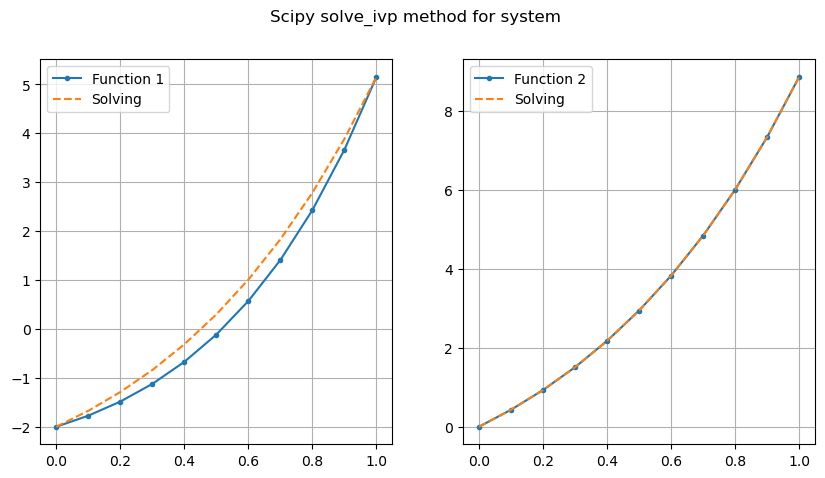

In [100]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Scipy solve_ivp method for system')
ax1.plot(x, f1(x), '.-', label='Function 1')
ax1.plot(x, y1, '--', label='Solving')
ax1.legend()
ax1.grid()
ax2.plot(x, f2(x), '.-', label='Function 2')
ax2.plot(x, y2, '--', label='Solving')
ax2.legend()
ax2.grid()

In [101]:
!.\main.exe

Solving of ODE

step: 0.10
Runge-Kutta method absolute error in x = 0.50: 0.00
Milne method relative error in x = 0.50: 0.00
Runge-Kutta method absolute error in x = 1.00: 0.00
Milne method relative error in x = 1.00: 0.00

step: 0.01
Runge-Kutta method absolute error in x = 0.50: 0.00
Milne method relative error in x = 0.50: 0.00
Runge-Kutta method absolute error in x = 1.00: 0.00
Milne method relative error in x = 1.00: 0.00

step: 0.00
Runge-Kutta method absolute error in x = 0.50: 0.00
Milne method relative error in x = 0.50: 0.00
Runge-Kutta method absolute error in x = 1.00: 0.00
Milne method relative error in x = 1.00: 0.00



Solving of ODE system

Runge-Kutta method absolute error for f1 in x = 1.00: 0.00
Runge-Kutta method relative error for f1 in x = 1.00: 0.00
Runge-Kutta method absolute error for f2 in x = 1.00: 0.00
Runge-Kutta method relative error for f2 in x = 1.00: 0.00


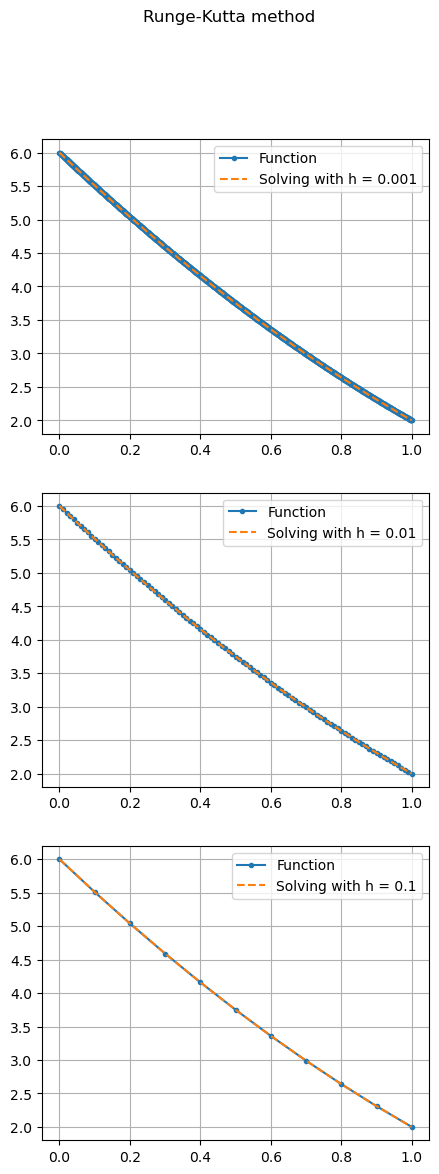

In [102]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 13))
fig.suptitle('Runge-Kutta method')

x, y = get_x_y(files[3])
ax1.plot(x, f(x), '.-', label='Function')
ax1.plot(x, y, '--', label='Solving with h = 0.001')
ax1.legend()
ax1.grid()

x, y = get_x_y(files[4])
ax2.plot(x, f(x), '.-', label='Function')
ax2.plot(x, y, '--', label='Solving with h = 0.01')
ax2.legend()
ax2.grid()

x, y = get_x_y(files[5])
ax3.plot(x, f(x), '.-', label='Function')
ax3.plot(x, y, '--', label='Solving with h = 0.1')
ax3.legend()
ax3.grid()

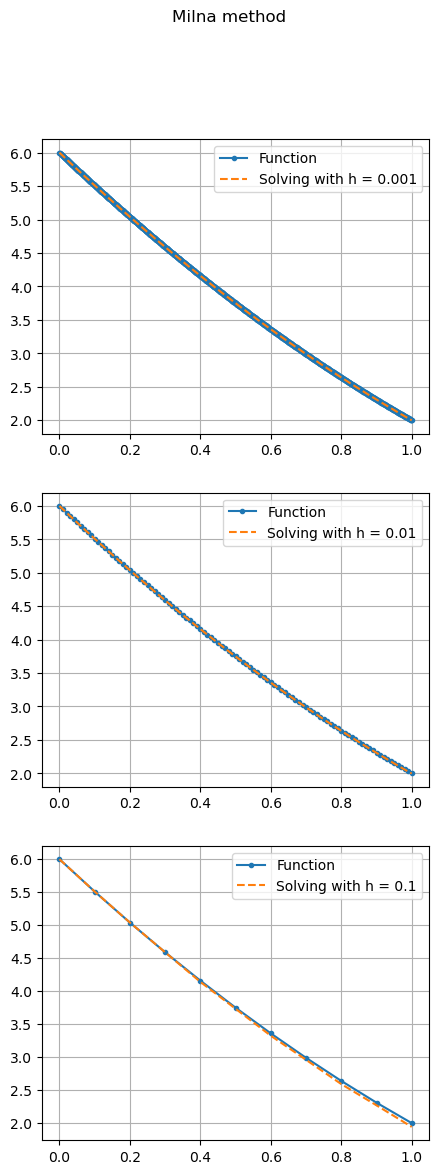

In [103]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(5, 13))
fig.suptitle('Milna method')

x, y = get_x_y(files[0])
ax1.plot(x, f(x), '.-', label='Function')
ax1.plot(x, y, '--', label='Solving with h = 0.001')
ax1.legend()
ax1.grid()

x, y = get_x_y(files[1])
ax2.plot(x, f(x), '.-', label='Function')
ax2.plot(x, y, '--', label='Solving with h = 0.01')
ax2.legend()
ax2.grid()

x, y = get_x_y(files[2])
ax3.plot(x, f(x), '.-', label='Function')
ax3.plot(x, y, '--', label='Solving with h = 0.1')
ax3.legend()
ax3.grid()

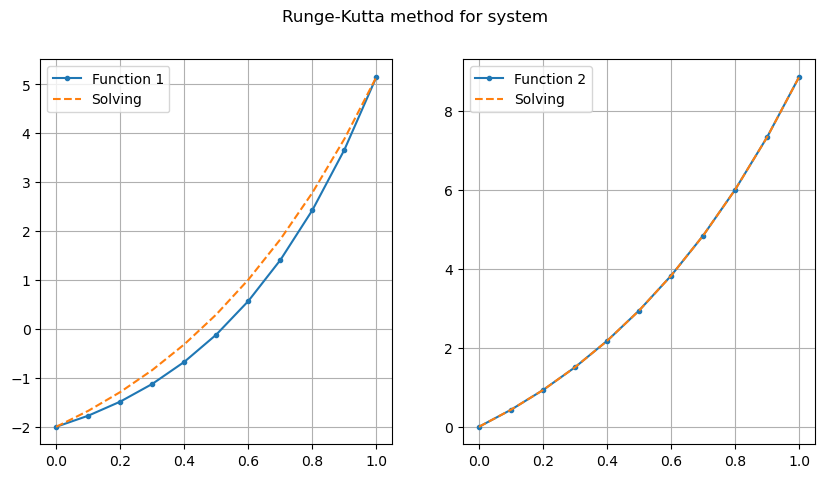

In [104]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
fig.suptitle('Runge-Kutta method for system')

x, y = get_x_y(files[6])
ax1.plot(x, f1(x), '.-', label='Function 1')
ax1.plot(x, y, '--', label='Solving')
ax1.legend()
ax1.grid()

x, y = get_x_y(files[7])
ax2.plot(x, f2(x), '.-', label='Function 2')
ax2.plot(x, y, '--', label='Solving')
ax2.legend()
ax2.grid()